In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ob1_winner = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_winner_data.csv")
ob1_loser = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_loser_data.csv")

In [3]:
ob1_winner.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,gameId
0,200,Win,False,True,True,False,True,True,4.247263e+09
1,100,Win,False,False,False,False,True,True,4.247156e+09
2,200,Win,True,True,True,False,True,True,4.243963e+09
3,200,Win,True,True,False,False,False,True,4.241678e+09
4,100,Win,True,True,True,True,True,True,4.241539e+09


In [4]:
ob1_loser.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,gameId
0,100,Fail,True,False,False,False,False,False,4.247263e+09
1,200,Fail,True,True,False,False,False,False,4.247156e+09
2,100,Fail,False,False,False,False,False,False,4.243963e+09
3,100,Fail,False,False,False,True,True,False,4.241678e+09
4,200,Fail,False,False,False,False,False,False,4.241539e+09


In [5]:
ob1_winner.info()
print(" ")
ob1_loser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   teamId           108829 non-null  int64  
 1   win              108829 non-null  object 
 2   firstBlood       108829 non-null  bool   
 3   firstTower       108829 non-null  bool   
 4   firstInhibitor   108829 non-null  bool   
 5   firstBaron       108829 non-null  bool   
 6   firstDragon      108829 non-null  bool   
 7   firstRiftHerald  108829 non-null  bool   
 8   gameId           108829 non-null  float64
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 3.1+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   teamId           108829 non-null  int64  
 1   win              108817 non-null  object 
 2

In [6]:
ob1_loser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   teamId           108829 non-null  int64  
 1   win              108817 non-null  object 
 2   firstBlood       108829 non-null  bool   
 3   firstTower       108829 non-null  bool   
 4   firstInhibitor   108829 non-null  bool   
 5   firstBaron       108829 non-null  bool   
 6   firstDragon      108829 non-null  bool   
 7   firstRiftHerald  108829 non-null  bool   
 8   gameId           108829 non-null  float64
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
#fill the NaN
ob1_loser["win"].fillna("Fail", inplace = True)
ob1_loser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   teamId           108829 non-null  int64  
 1   win              108829 non-null  object 
 2   firstBlood       108829 non-null  bool   
 3   firstTower       108829 non-null  bool   
 4   firstInhibitor   108829 non-null  bool   
 5   firstBaron       108829 non-null  bool   
 6   firstDragon      108829 non-null  bool   
 7   firstRiftHerald  108829 non-null  bool   
 8   gameId           108829 non-null  float64
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
#taking only data with teamId 100 from winners
dfw100 = ob1_winner[ob1_winner["teamId"] == 100]

#taking only data with teamId 200 from winners
dfw200 = ob1_winner[ob1_winner["teamId"] == 200]

#taking only data with teamId 100 from losers
dfl100 = ob1_loser[ob1_loser["teamId"] == 100]

#taking only data with teamId 200 from losers
dfl200 = ob1_loser[ob1_loser["teamId"] == 200]

In [9]:
#merging team 100
frame100 = [dfw100, dfl100]
team100 = pd.concat(frame100)

#merging team 200
frame200 = [dfw200, dfl200]
team200 = pd.concat(frame200)

In [10]:
#shuffling
team100 = shuffle(team100)
team200 = shuffle(team200)


In [11]:
#Random Forest training

#drop columns "teamId" and "gameId"
ft100 = team100.drop(["teamId", "gameId", "win"], axis = 1)
ft200 = team200.drop(["teamId", "gameId", "win"], axis = 1)

#set the labels
lb100 = team100.drop(["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald", "teamId", "gameId"], axis = 1)
lb200 = team200.drop(["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald", "teamId", "gameId"], axis = 1)

In [12]:
#splitting test and train sets of features
train100, test100, trainlb100, testlb100 = train_test_split(ft100, lb100, test_size = 0.33)
train200, test200, trainlb200, testlb200 = train_test_split(ft200, lb200, test_size = 0.33)

In [13]:
#Gaussian classifier team100
gauClas100 = RandomForestClassifier()
gauClas100.fit(train100, trainlb100.values.ravel())
pred100 = gauClas100.predict(test100)


In [14]:
#team100 prediction accuracy
print(metrics.accuracy_score(testlb100, pred100))


0.8414824302500418


In [15]:
#Gaussian classifier team100
gauClas200 = RandomForestClassifier()
gauClas200.fit(train200, trainlb200.values.ravel())
pred200 = gauClas200.predict(test200)


In [16]:
#team200 prediction accuracy
print(metrics.accuracy_score(testlb200, pred200))


0.8429024892799465


<AxesSubplot:>

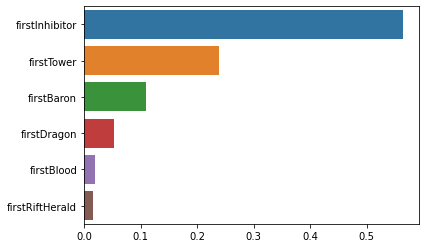

In [17]:
#feature importance scoring
names = ["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald"]
feature_score = pd.Series(gauClas100.feature_importances_, index = names).sort_values(ascending = False)

sns.barplot(x=feature_score, y=feature_score.index)

In [18]:
#team100 without inhibitor
ft100x = team100.drop(["teamId", "gameId", "win", "firstInhibitor", "firstBaron"], axis = 1)
lb100x = team100.drop(["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald", "teamId", "gameId"], axis = 1)

ft100tr, ft100ts, lb100tr, lb100ts = train_test_split(ft100x, lb100x, test_size = 0.33)

gauClas100x = RandomForestClassifier()
gauClas100x.fit(ft100tr, lb100tr.values.ravel())
pred100x = gauClas100x.predict(ft100ts)

print(metrics.accuracy_score(lb100ts, pred100x))

0.7309405802751017


In [19]:
#team200 withput inhibitor
ft200x = team200.drop(["teamId", "gameId", "win", "firstInhibitor", "firstBaron"], axis = 1)
lb200x = team200.drop(["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald", "teamId", "gameId"], axis = 1)

ft200tr, ft200ts, lb200tr, lb200ts = train_test_split(ft200x, lb200x, test_size = 0.33)

gauClas200x = RandomForestClassifier()
gauClas200x.fit(ft200tr, lb200tr.values.ravel())
pred200x = gauClas100x.predict(ft200ts)

Random_Forest_Acc = metrics.accuracy_score(lb200ts, pred200x)
Random_Forest_Acc

0.731608843347998

In [20]:
#list blood, tower, dragon, herald
gauClas100x.predict([[False, False, False, False]])

array(['Fail'], dtype=object)

In [21]:
#firstBlood	firstTower	firstInhibitor	firstBaron	firstDragon	firstRiftHerald
gauClas100.predict([[False, True, False, True, False, True]])

array(['Fail'], dtype=object)

<AxesSubplot:>

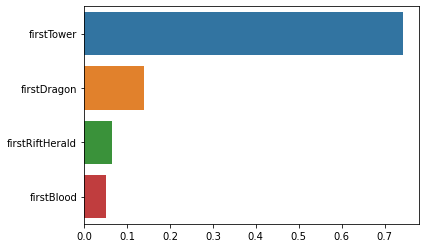

In [22]:
#feature importance scoring
namesx = ["firstBlood", "firstTower", "firstDragon", "firstRiftHerald"]
feature_scorex = pd.Series(gauClas100x.feature_importances_, index = namesx).sort_values(ascending = False)

sns.barplot(x=feature_scorex, y=feature_scorex.index)

In [23]:
#Logistic Regression

#pre-process data
frame = [dfw100, dfl100]
teamLR = pd.concat(frame)

featureLR = teamLR.drop(["teamId", "gameId", "win", "firstInhibitor", "firstBaron"], axis = 1)
labelLR = teamLR.drop(["firstBlood", "firstTower", "firstInhibitor", "firstBaron", "firstDragon", "firstRiftHerald", "teamId", "gameId"], axis = 1)
labelLR = labelLR.values.ravel()

ft_trLR, ft_tsLR, lb_trLR, lb_tsLR = train_test_split(featureLR, labelLR, test_size = 0.33, random_state = 42)

#fit the model
logReg = LogisticRegression(solver = "liblinear", random_state = 0)
logReg.fit(ft_trLR, lb_trLR)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
logReg = LogisticRegression(solver = "liblinear", random_state = 0).fit(ft_trLR, lb_trLR)

In [25]:
logReg.classes_

array(['Fail', 'Win'], dtype=object)

In [26]:
#probability of prediction
LR_prob = logReg.predict_proba(ft_tsLR)
LR_prob

array([[0.23987286, 0.76012714],
       [0.81065203, 0.18934797],
       [0.23987286, 0.76012714],
       ...,
       [0.16190729, 0.83809271],
       [0.44096547, 0.55903453],
       [0.32563972, 0.67436028]])

In [27]:
#decision prediction
LR_pred = logReg.predict(ft_tsLR)
LR_pred

array(['Win', 'Fail', 'Win', ..., 'Win', 'Win', 'Win'], dtype=object)

In [28]:
Logistic_Regression_Acc = metrics.accuracy_score(lb_tsLR, LR_pred)
Logistic_Regression_Acc

0.7295483655399009

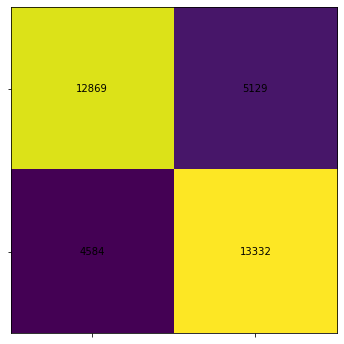

In [29]:
cm = confusion_matrix(lb_tsLR, LR_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("", ""))
ax.yaxis.set(ticks = (0,1), ticklabels = ("", ""))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va = "center", color = "black")
plt.show()

In [30]:
print(classification_report(lb_tsLR, LR_pred))

              precision    recall  f1-score   support

        Fail       0.74      0.72      0.73     17998
         Win       0.72      0.74      0.73     17916

    accuracy                           0.73     35914
   macro avg       0.73      0.73      0.73     35914
weighted avg       0.73      0.73      0.73     35914



In [31]:
#Support Vector Machine

#pre-processing copying data from LR
ftrSVM = ft_trLR
ftsSVM = ft_tsLR
ltrSVM = lb_trLR
ltsSVM = lb_tsLR

#fitting
svmClas = svm.SVC(kernel = "linear")

svmClas.fit(ftrSVM, ltrSVM)

svmPred = svmClas.predict(ftsSVM)

In [32]:
#calculate its accuracy
Support_Vector_Machine_Acc = metrics.accuracy_score(ltsSVM, svmPred)
Support_Vector_Machine_Acc

0.7295483655399009

In [33]:
print(classification_report(ltsSVM, svmPred))

              precision    recall  f1-score   support

        Fail       0.74      0.72      0.73     17998
         Win       0.72      0.74      0.73     17916

    accuracy                           0.73     35914
   macro avg       0.73      0.73      0.73     35914
weighted avg       0.73      0.73      0.73     35914



In [34]:
#Naive Bayes


#copying training and testing data from previous models
ftrNB = ft_trLR
ftsNB = ft_tsLR
ltrNB = lb_trLR
ltsNB = lb_tsLR

In [35]:
#Fitting the model
NB = GaussianNB()
NB.fit(ftrNB, ltrNB)

nbPred = NB.predict(ftsNB)

Naive_Bayes_Acc = metrics.accuracy_score(ltsNB, nbPred)
Naive_Bayes_Acc

0.7231441777579773

In [36]:
print(classification_report(ltsNB, nbPred))

              precision    recall  f1-score   support

        Fail       0.72      0.74      0.73     17998
         Win       0.73      0.71      0.72     17916

    accuracy                           0.72     35914
   macro avg       0.72      0.72      0.72     35914
weighted avg       0.72      0.72      0.72     35914



In [37]:
#KNN
#copying training and testing data from previous models
ftrKNN = ft_trLR
ftsKNN = ft_tsLR
ltrKNN = lb_trLR
ltsKNN = lb_tsLR

Text(0.5, 1.0, 'Elbow Method')

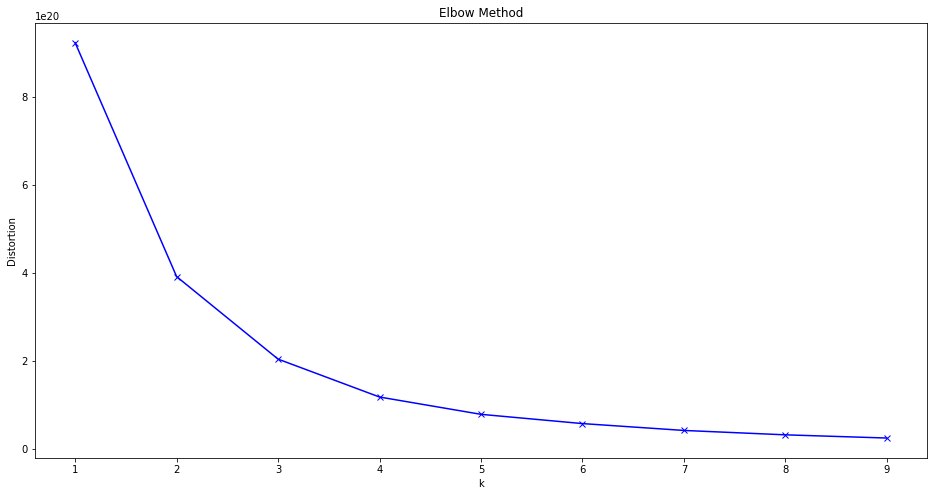

In [38]:
#find the K with elbow method

kmeanDF = team100.drop(["win"], axis = 1)

dist = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(kmeanDF)
    dist.append(kmeanModel.inertia_)

plt.figure(figsize = (16, 8))
plt.plot(K, dist, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Elbow Method")

In [39]:
#fit the model

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(ftrKNN, ltrKNN)

knnPred = knn.predict(ftsKNN)

K_Nearest_Neighbors_Acc = metrics.accuracy_score(ltsKNN, knnPred)
K_Nearest_Neighbors_Acc

0.7155426853037813

In [40]:
print(classification_report(ltsKNN, knnPred))

              precision    recall  f1-score   support

        Fail       0.73      0.69      0.71     17998
         Win       0.70      0.74      0.72     17916

    accuracy                           0.72     35914
   macro avg       0.72      0.72      0.72     35914
weighted avg       0.72      0.72      0.72     35914



In [41]:
#change the K
knnX = KNeighborsClassifier(n_neighbors = 7)
knnX.fit(ftrKNN, ltrKNN)

knnPredX = knnX.predict(ftsKNN)
K_Nearest_NeighborsX_Acc = metrics.accuracy_score(ltsKNN, knnPredX)
K_Nearest_NeighborsX_Acc

0.7231441777579773

In [42]:
print(classification_report(ltsKNN, knnPredX))

              precision    recall  f1-score   support

        Fail       0.72      0.74      0.73     17998
         Win       0.73      0.71      0.72     17916

    accuracy                           0.72     35914
   macro avg       0.72      0.72      0.72     35914
weighted avg       0.72      0.72      0.72     35914



In [43]:
#Overview of the 5 ML techniques

RF = "{:.2f}".format(Random_Forest_Acc*100)+"%"
LR = "{:.2f}".format(Logistic_Regression_Acc*100)+"%"
SVM = "{:.2f}".format(Support_Vector_Machine_Acc*100)+"%"
NB = "{:.2f}".format(Naive_Bayes_Acc*100)+"%"
KNN = "{:.2f}".format(K_Nearest_Neighbors_Acc*100)+"%"

print(RF, LR, SVM, NB, KNN)

73.16% 72.95% 72.95% 72.31% 71.55%
